Columns to Drop:
['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']
NULL Counts after Transformation:
id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                   

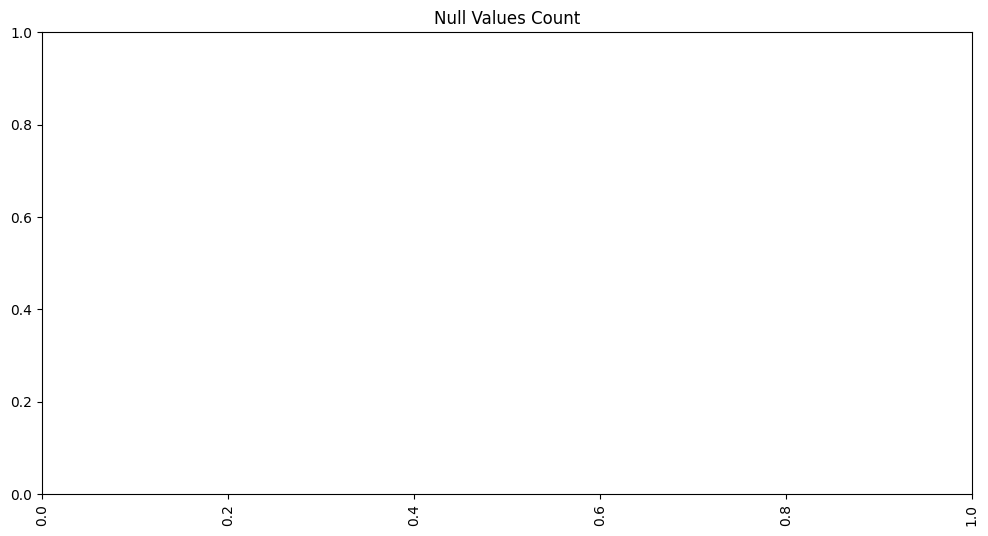

Cleaned DataFrame saved to 'loan_data_cleaned.csv'.


In [1]:
import pandas as pd
from dataframe_transform import DataFrameTransform
from plotter import Plotter

# Load the transformed data
df_transformed = pd.read_csv('/Users/mrhoti/Loan-Portfolio-Analysis-1/loan_data_transformed.csv')

# Instantiate the DataFrameTransform and Plotter classes
df_transformer = DataFrameTransform(df_transformed)
plotter = Plotter(df_transformed)

# Step 2: Determine and drop columns with high percentage of NULLs
null_counts = df_transformed.isnull().sum()
percentage_nulls = (null_counts / len(df_transformed)) * 100
columns_to_drop = percentage_nulls[percentage_nulls > 50].index.tolist()
df_transformer.drop_columns(columns_to_drop)

# Display columns to drop
print("Columns to Drop:")
print(columns_to_drop)

# Step 3: Impute remaining NULL values
for column in df_transformer.dataframe.columns:
    if df_transformer.dataframe[column].isnull().sum() > 0:
        if df_transformer.dataframe[column].dtype in ['float64', 'int64']:
            df_transformer.impute_column(column, method='median')
        else:
            df_transformer.impute_column(column, method='mode')

# Step 4: Check for NULL values again
null_counts_after = df_transformer.dataframe.isnull().sum()
percentage_nulls_after = (null_counts_after / len(df_transformer.dataframe)) * 100
print("NULL Counts after Transformation:")
print(percentage_nulls_after)

# Generate plot for NULL values after transformation
plotter.plot_nulls()

# Step 5: Save the cleaned DataFrame
df_transformer.save_dataframe('/Users/mrhoti/Loan-Portfolio-Analysis-1/loan_data_cleaned.csv')

print("Cleaned DataFrame saved to 'loan_data_cleaned.csv'.")


In [1]:
import pandas as pd
from dataframe_transform import DataFrameTransform
from plotter import Plotter


In [2]:
# Load the cleaned DataFrame
df = pd.read_csv('loan_data_cleaned.csv')


In [3]:
# Instantiate the DataFrameTransform and Plotter classes
df_transformer = DataFrameTransform(df)
plotter = Plotter(df)


In [4]:
# Step 1: Identify skewed columns
skewed_columns = df_transformer.identify_skewed_columns()
print(f"Skewed Columns: {skewed_columns}")


Skewed Columns: ['collection_recovery_fee', 'collections_12_mths_ex_med', 'recoveries', 'total_rec_late_fee', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'last_payment_amount', 'id', 'out_prncp_inv', 'out_prncp', 'member_id', 'total_rec_int', 'total_payment', 'total_rec_prncp', 'total_payment_inv', 'open_accounts']


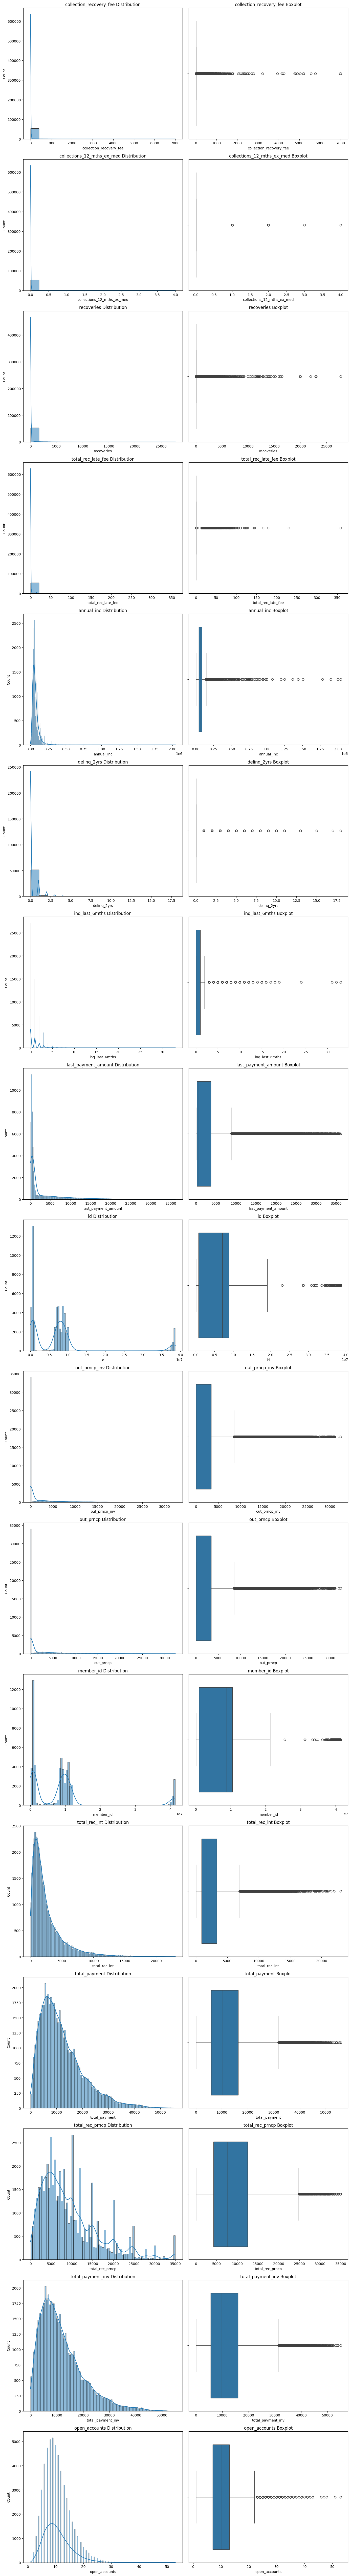

In [5]:
# Visualize skewed columns
plotter.plot_skewed_columns(skewed_columns)


In [6]:
# Step 2 & 3: Transform skewed columns
df_transformer.transform_skewed_columns(skewed_columns)


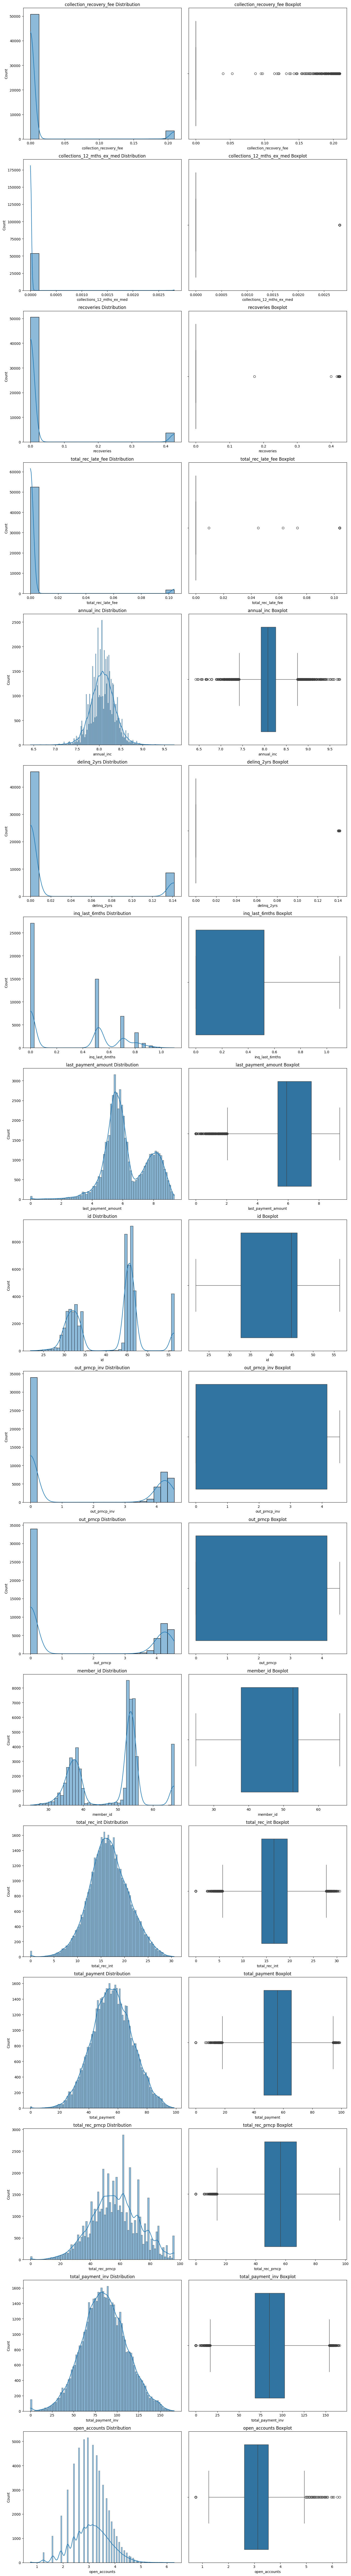

In [7]:
# Step 4: Visualize transformed columns
plotter.plot_skewed_columns(skewed_columns)


In [8]:
# Save the transformed DataFrame
df_transformed = df_transformer.get_dataframe()
df_transformed.to_csv('loan_data_transformed.csv', index=False)
print("Transformed DataFrame saved to 'loan_data_transformed.csv'.")


Transformed DataFrame saved to 'loan_data_transformed.csv'.


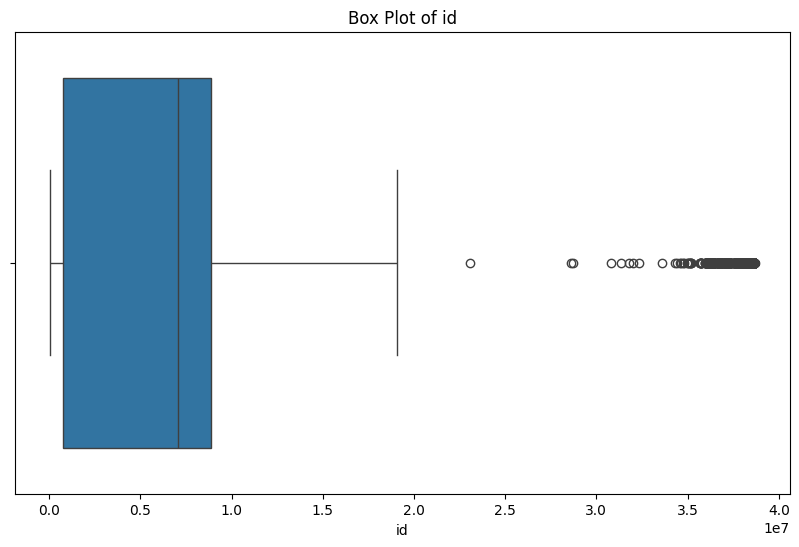

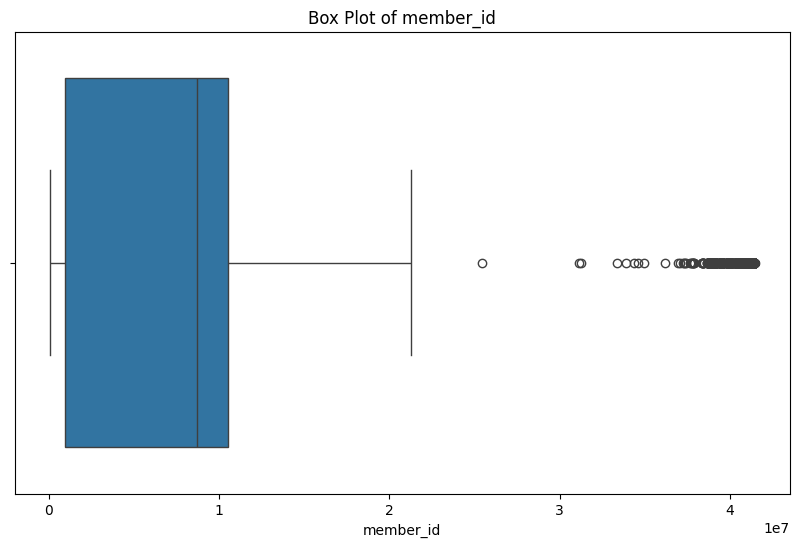

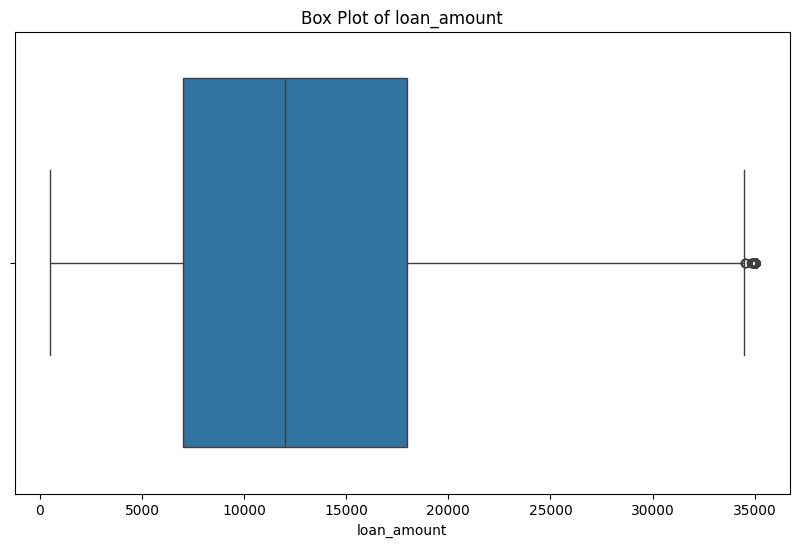

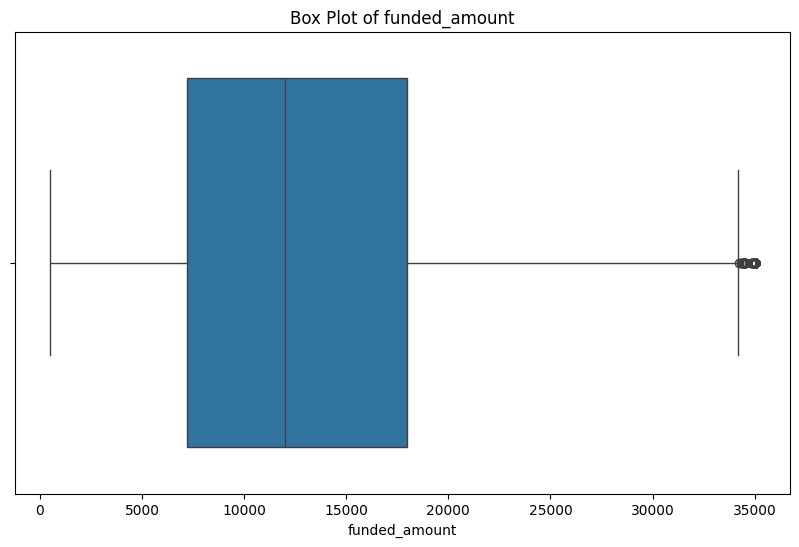

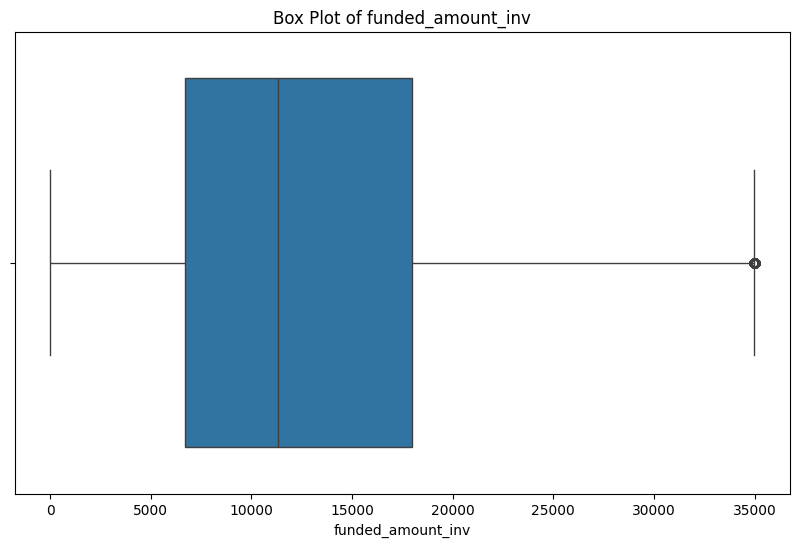

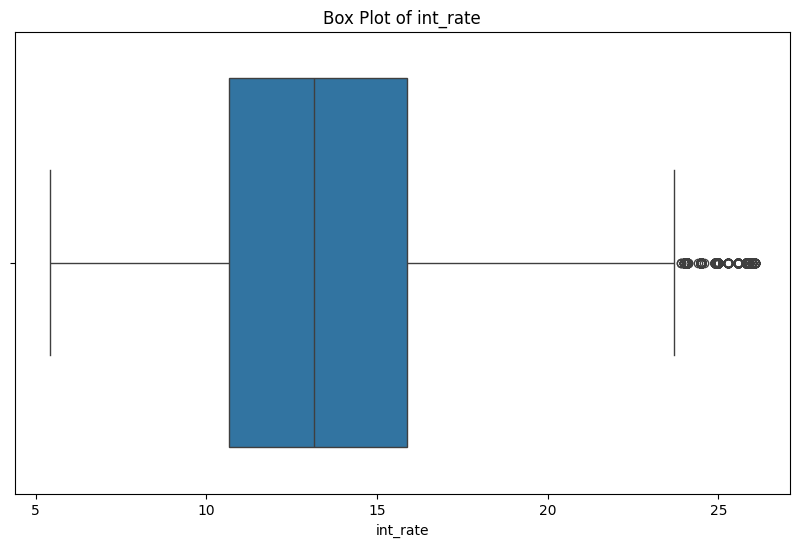

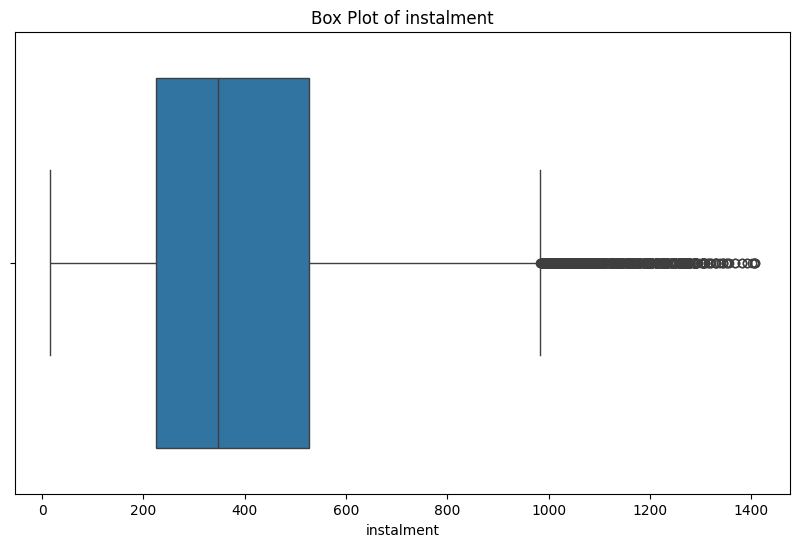

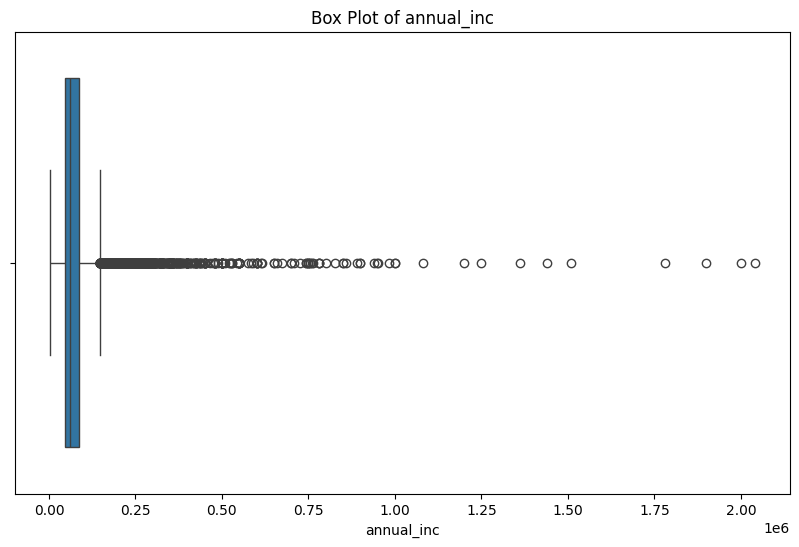

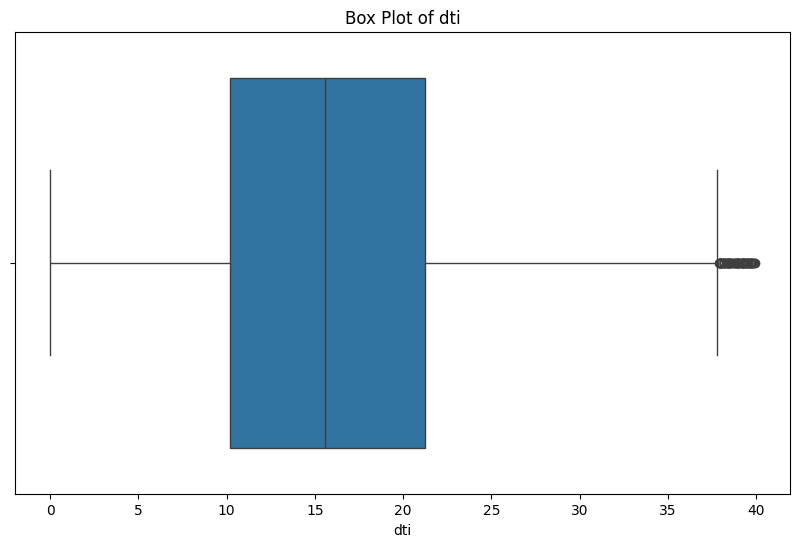

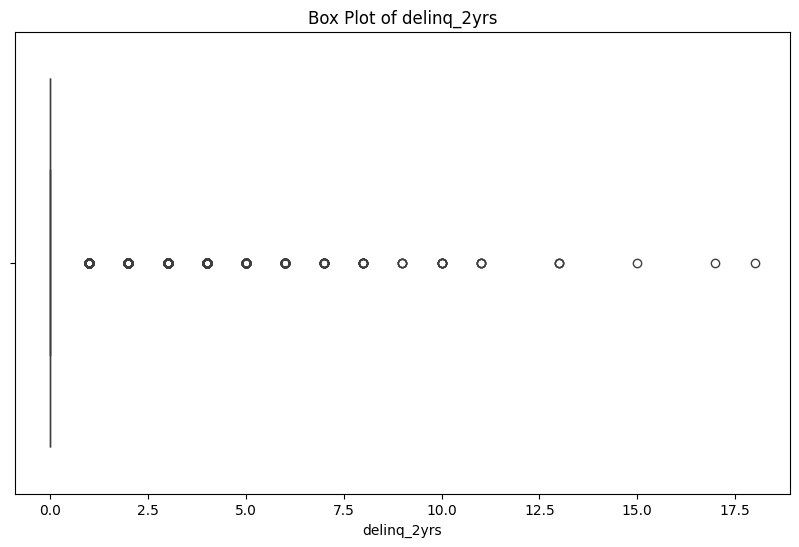

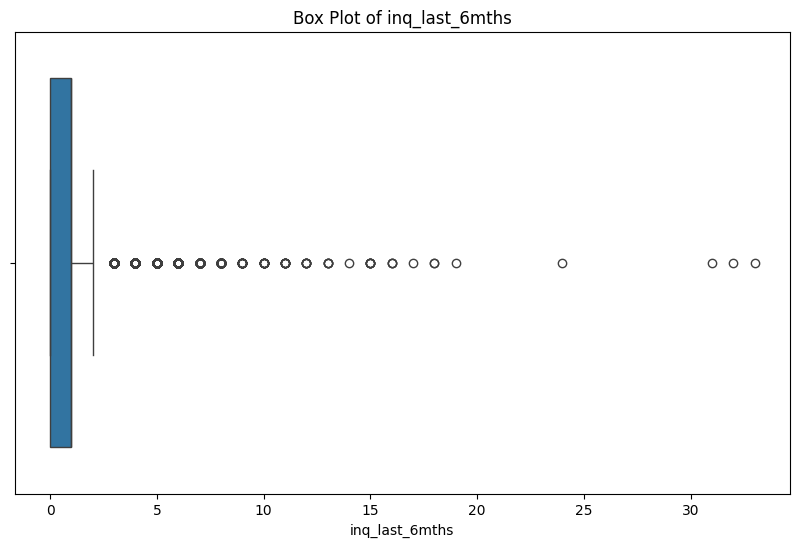

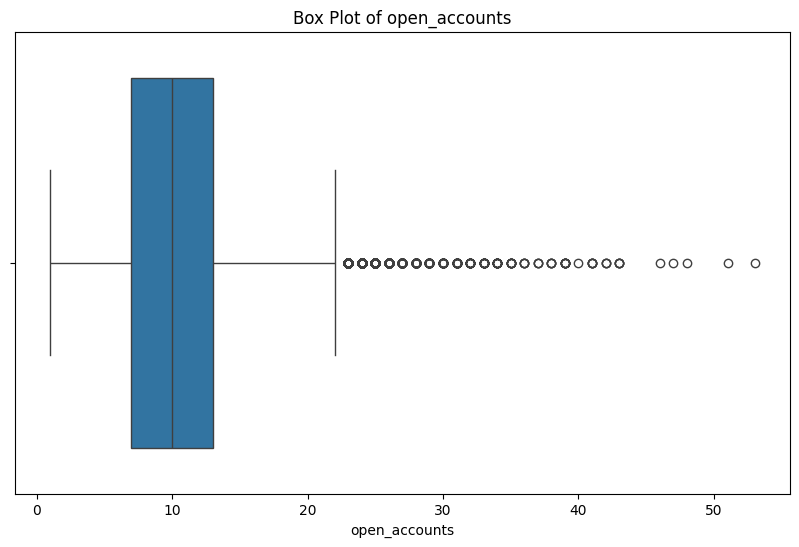

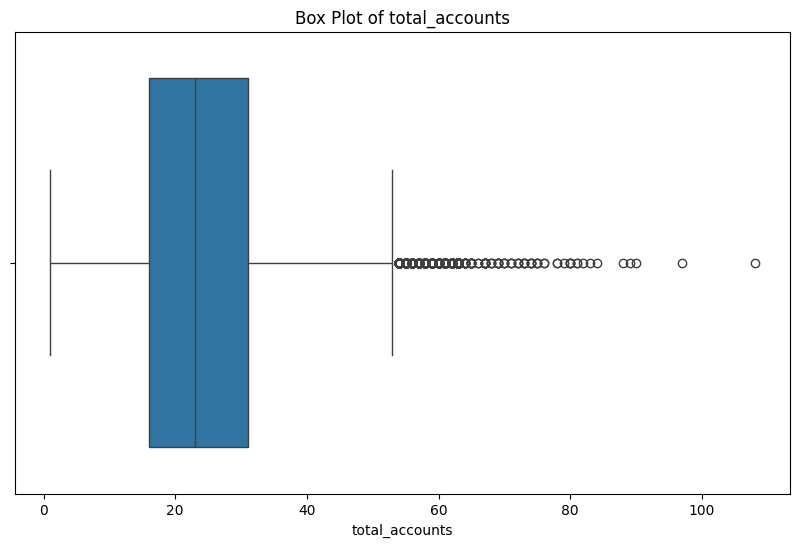

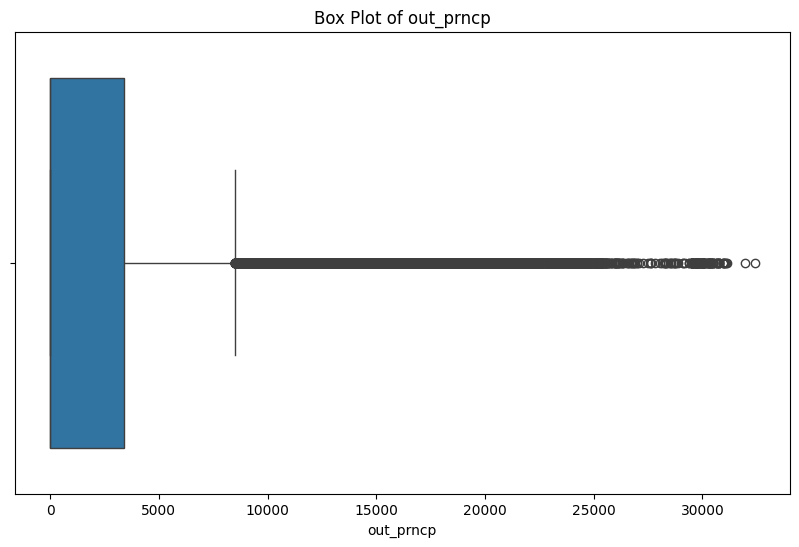

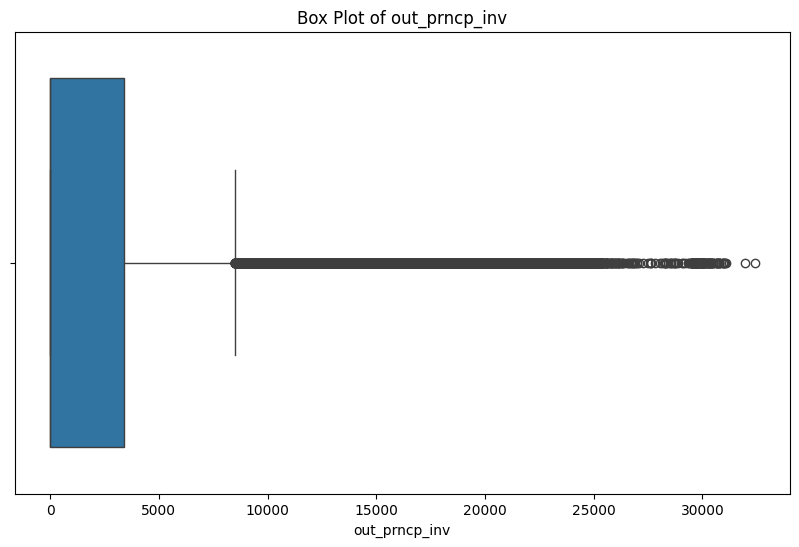

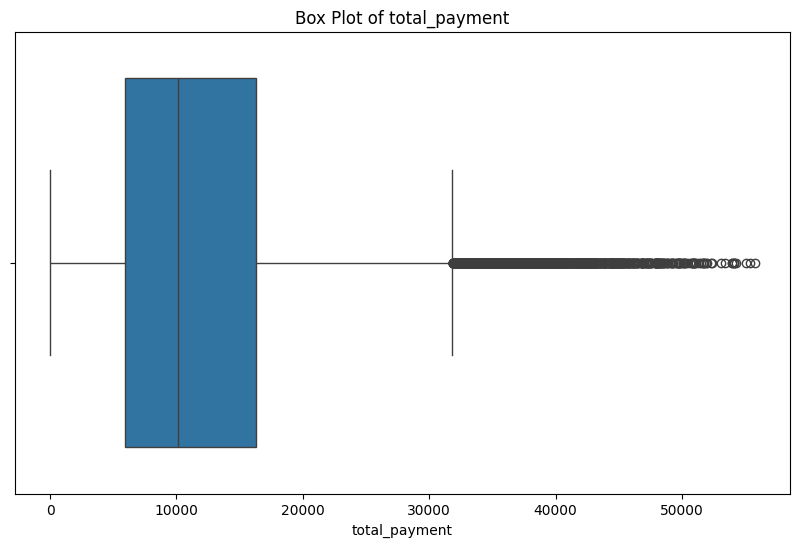

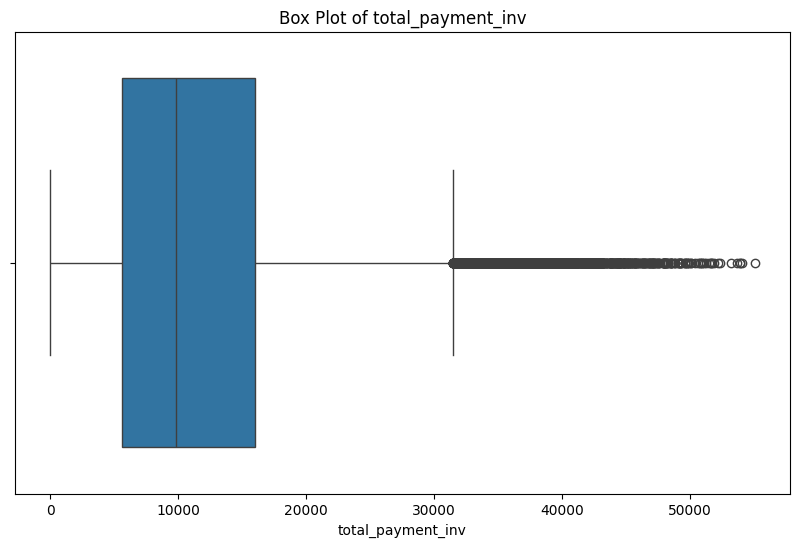

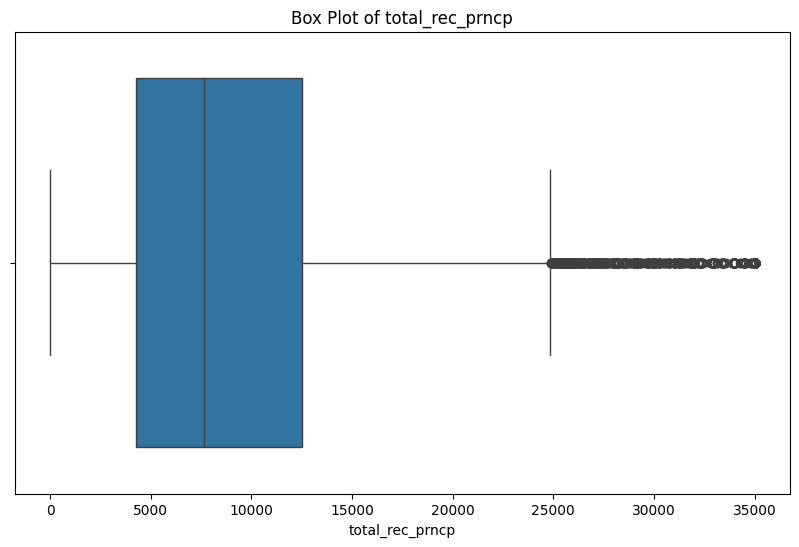

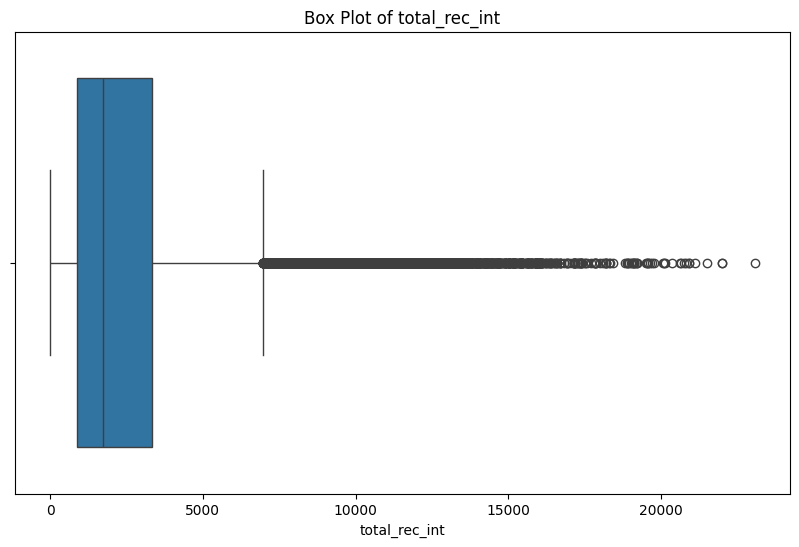

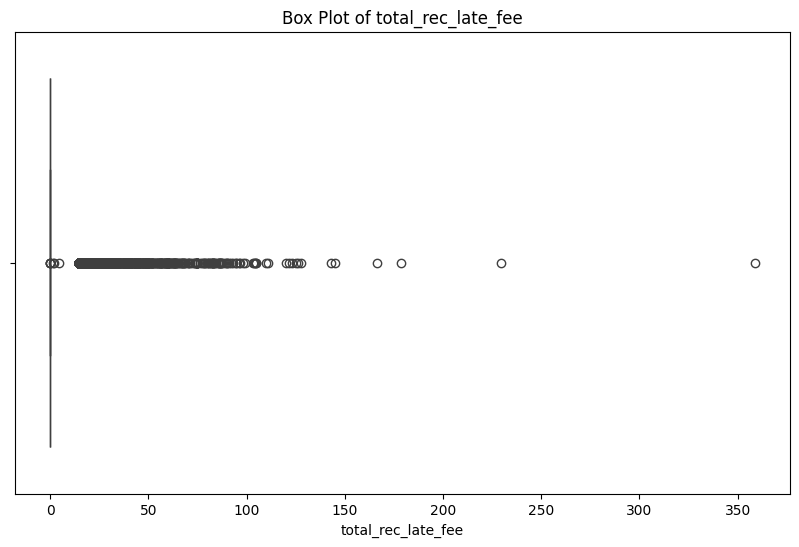

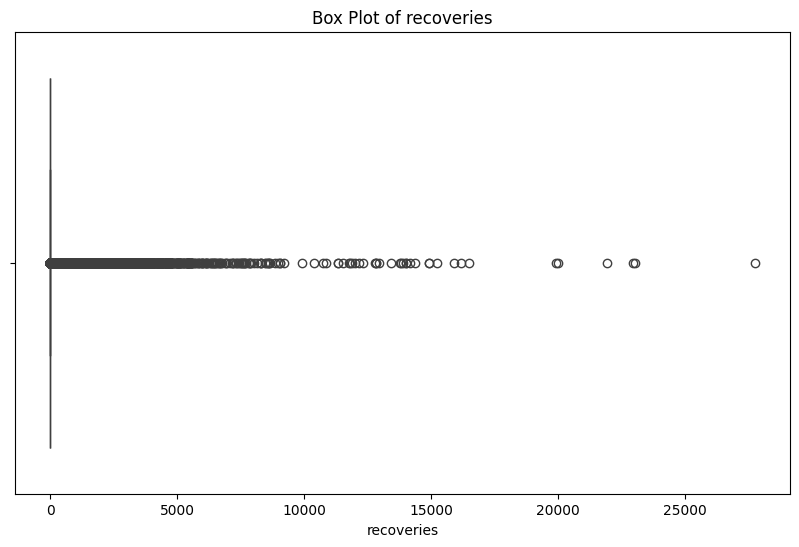

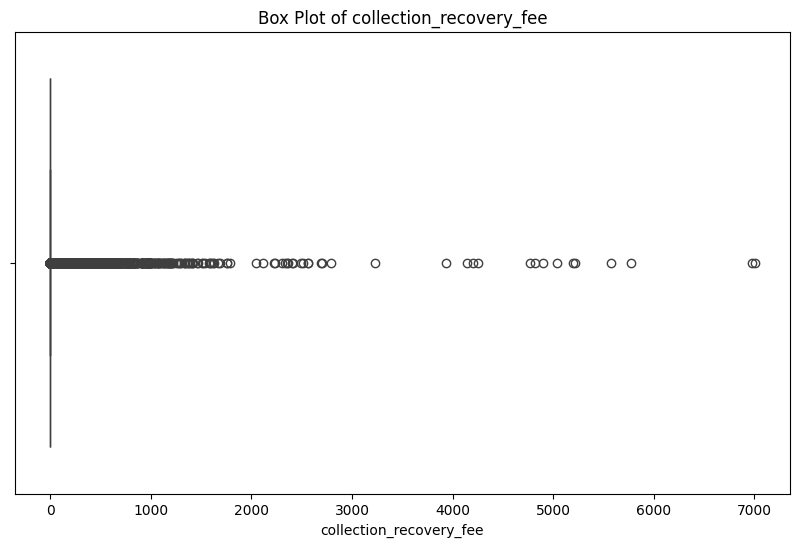

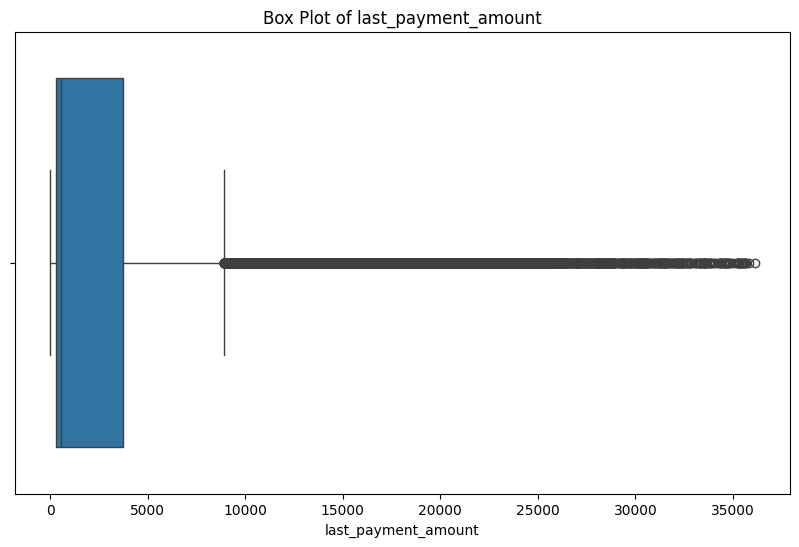

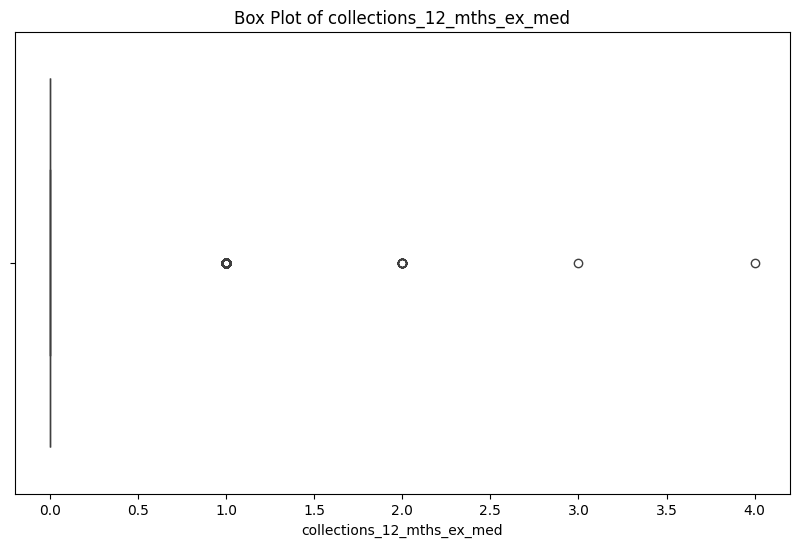

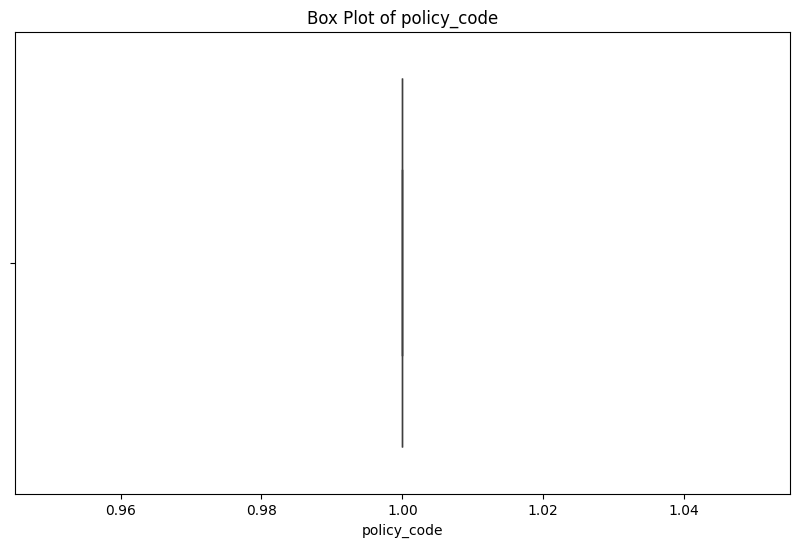

Outliers detected in id:
             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
4200   28632910   31166041        25000        25000.0            25000.0   
4201   23092909   25445834         7000         7000.0             7000.0   
31056  38068608    8207521        30000        30000.0            30000.0   
33311  38142329    1507917        31000        31000.0            31000.0   
53334  37842007     315527        25000        25000.0            25000.0   

            term  int_rate  instalment grade sub_g

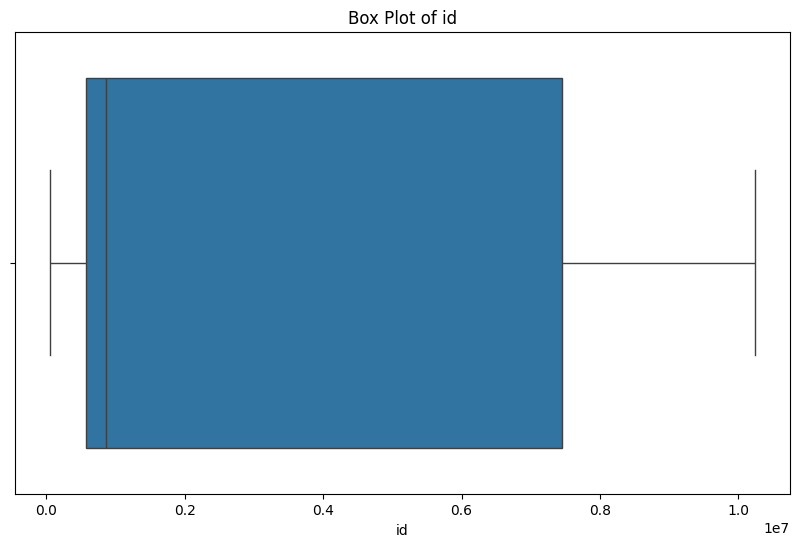

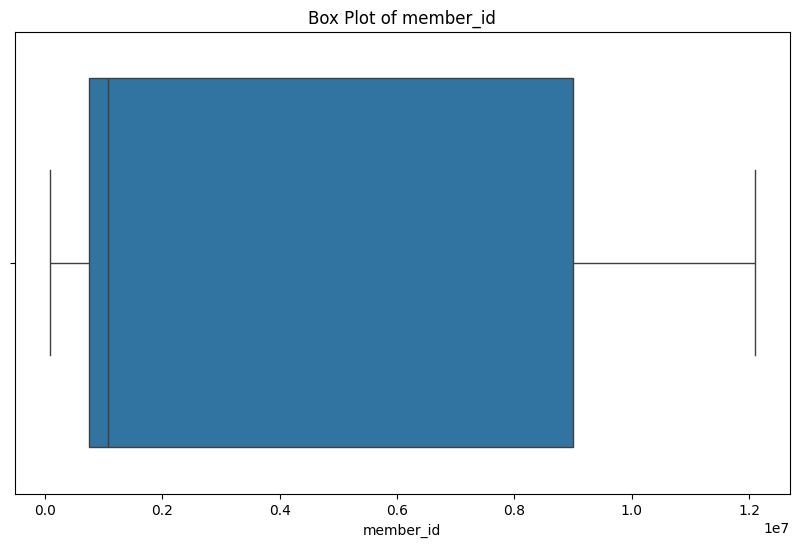

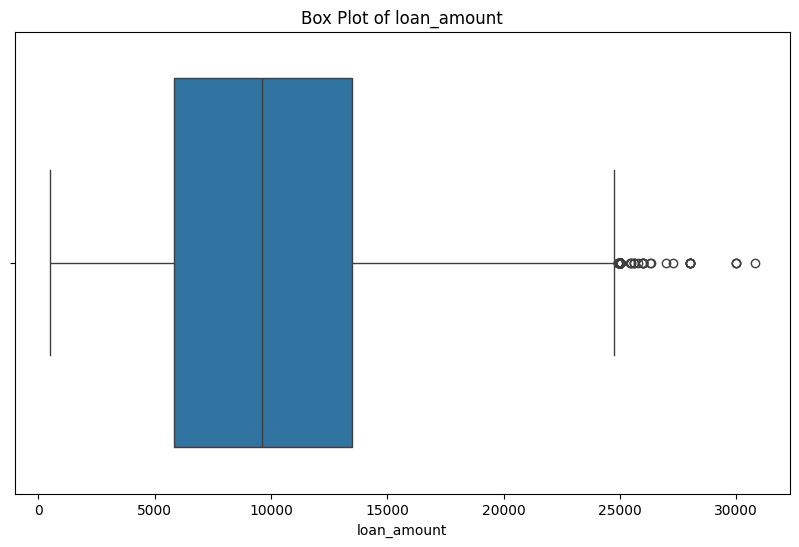

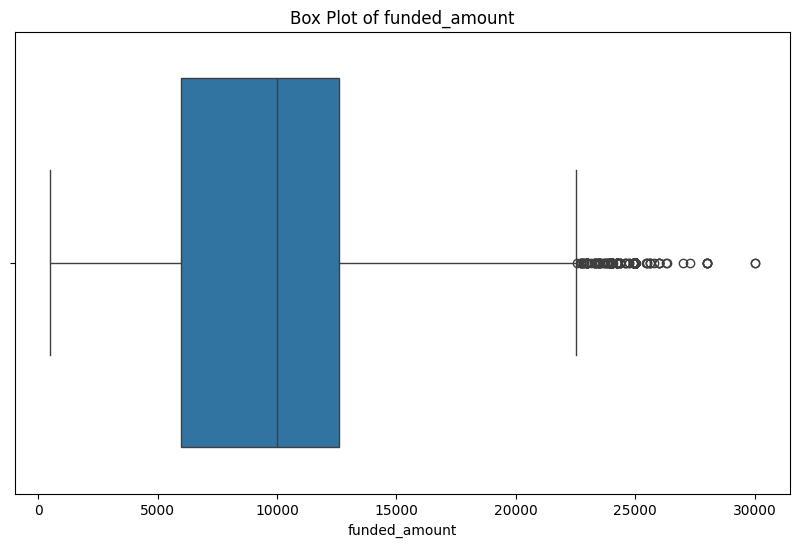

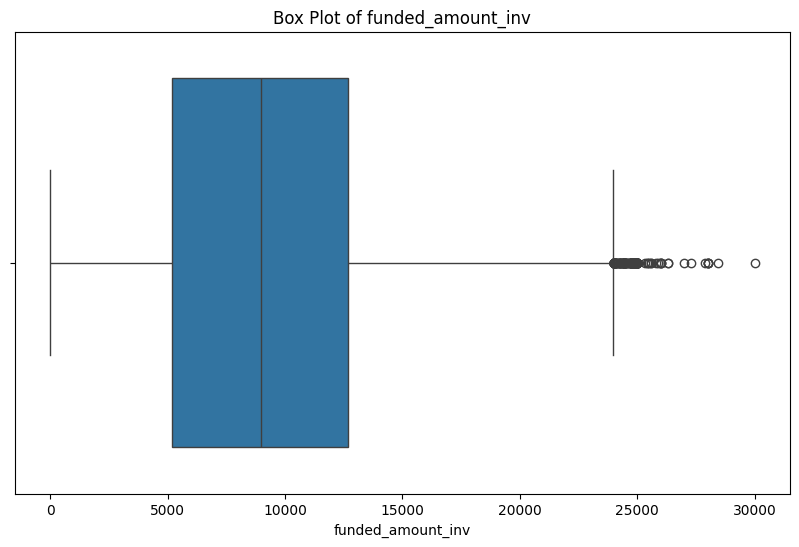

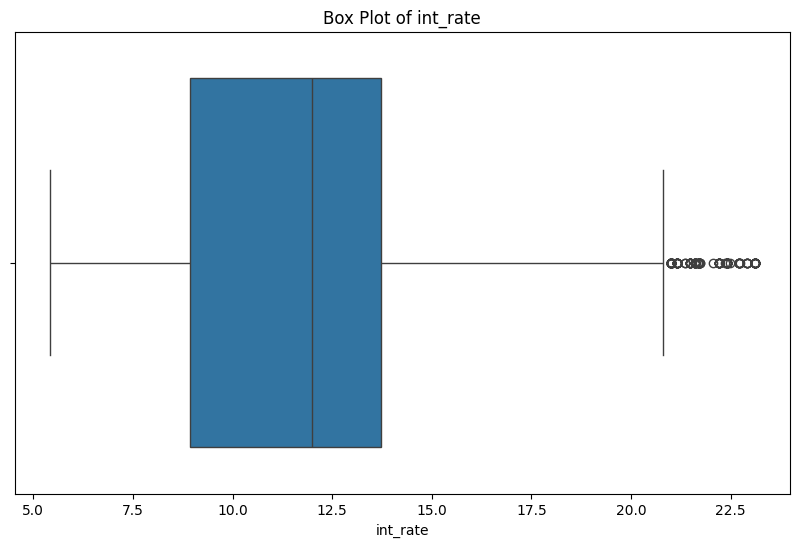

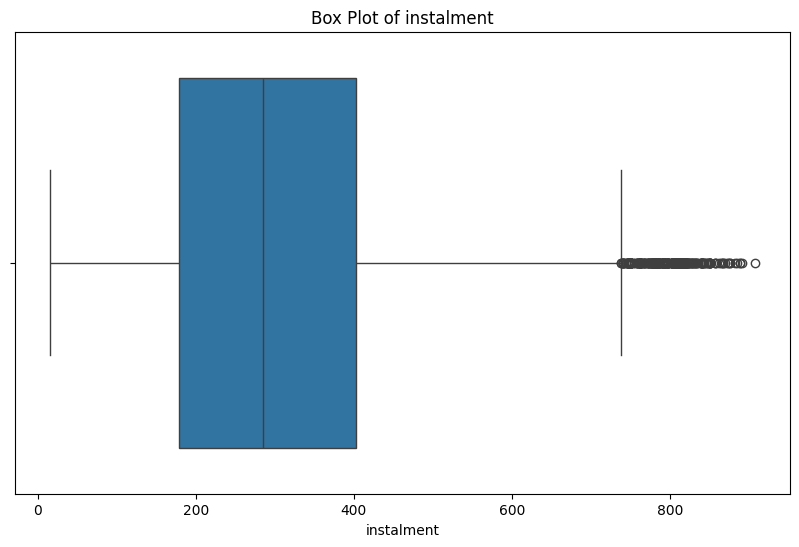

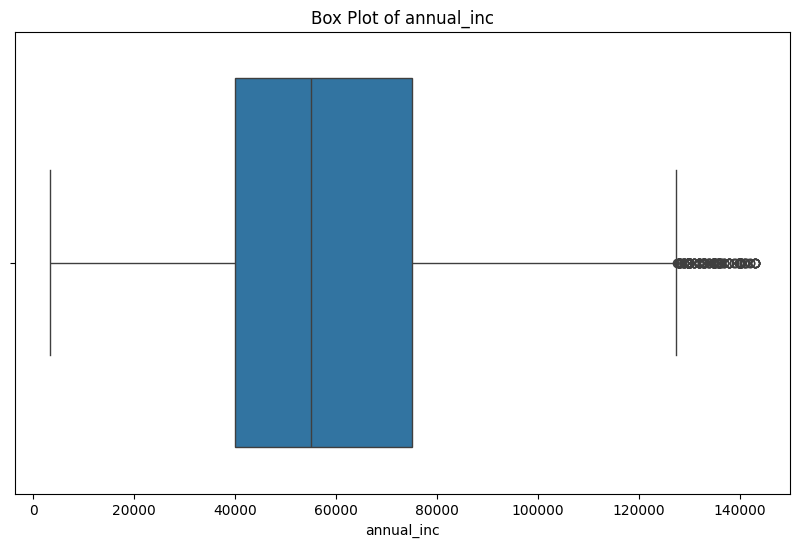

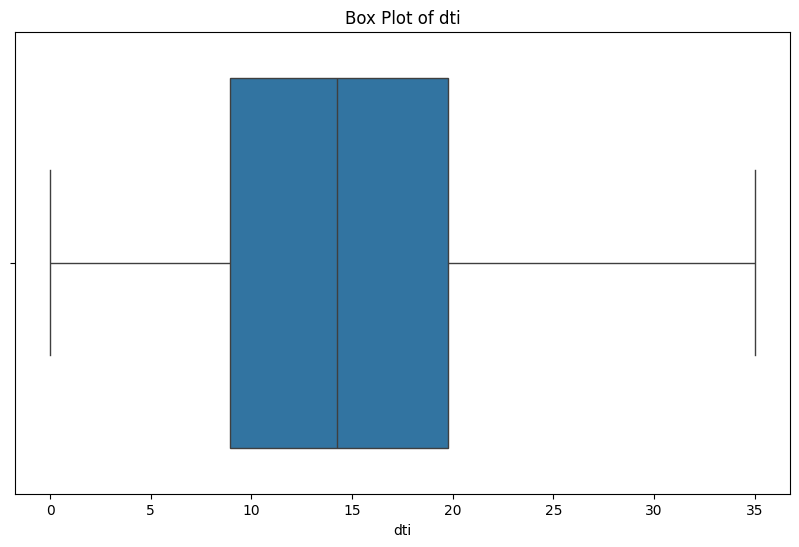

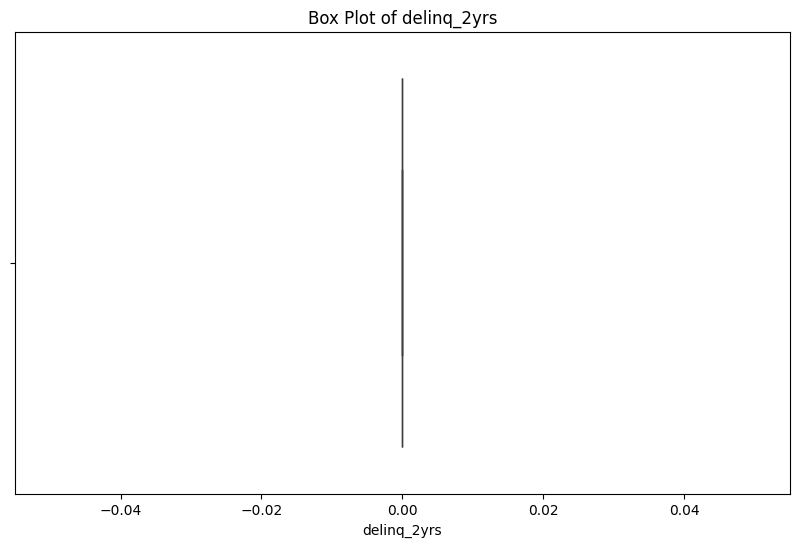

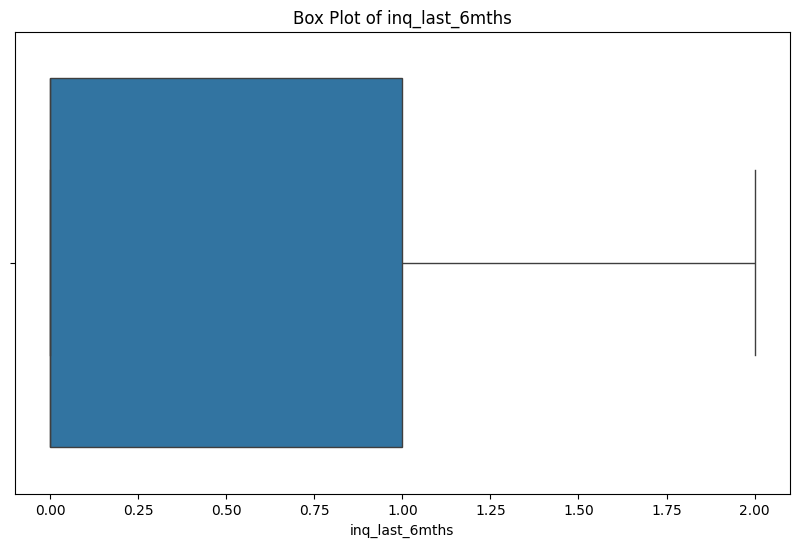

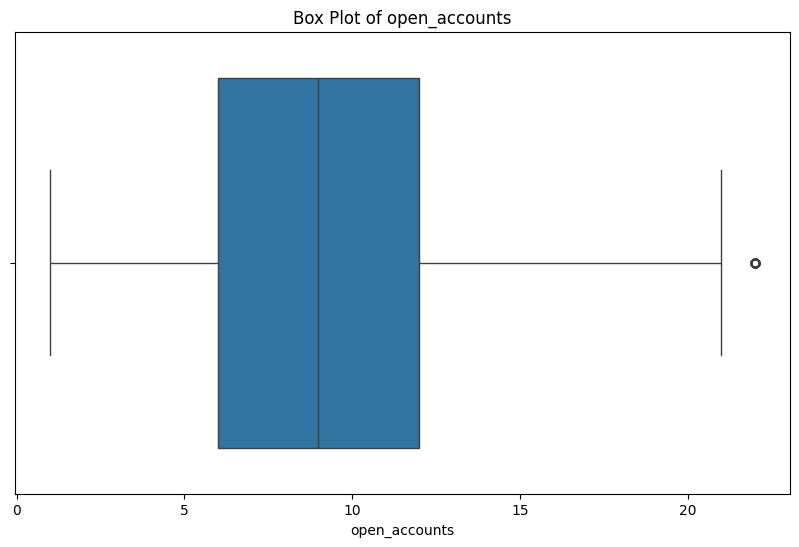

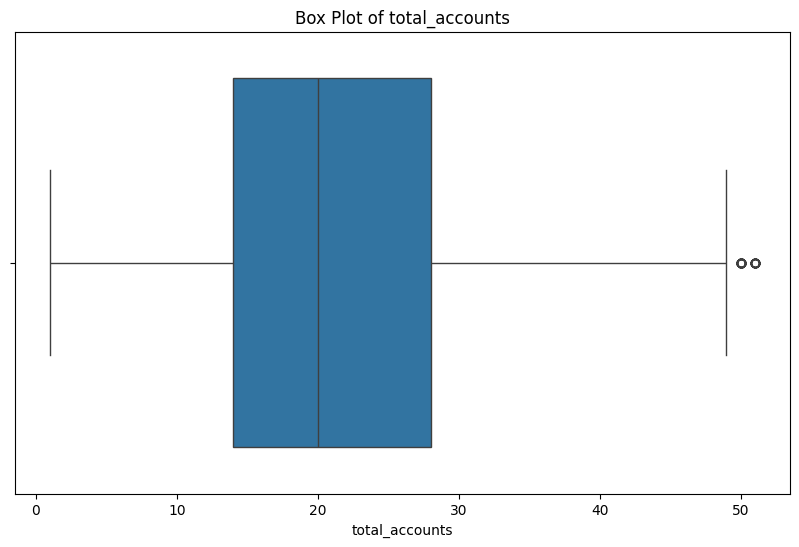

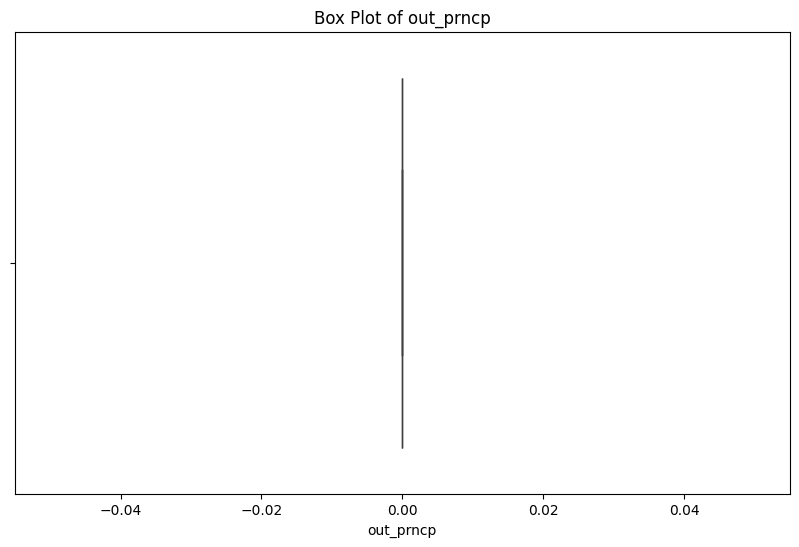

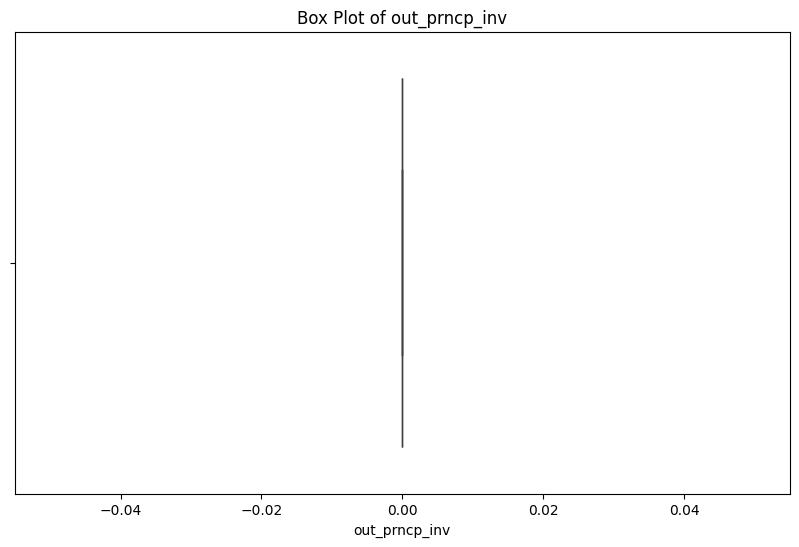

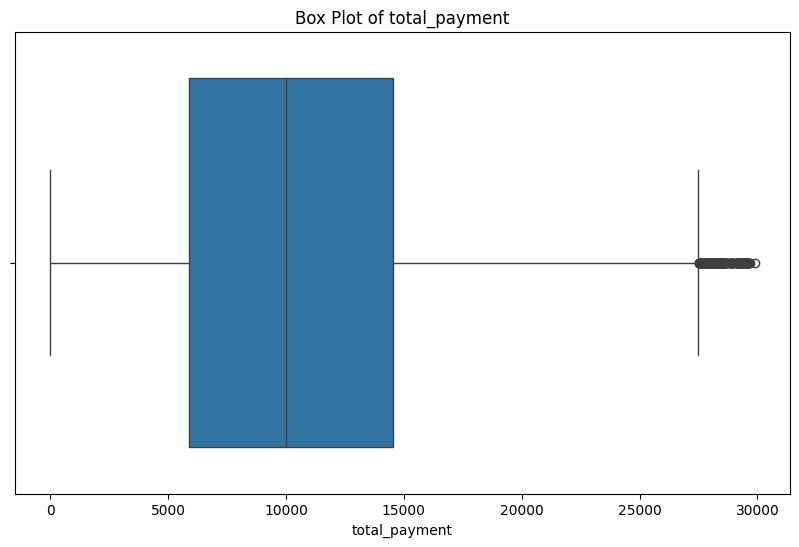

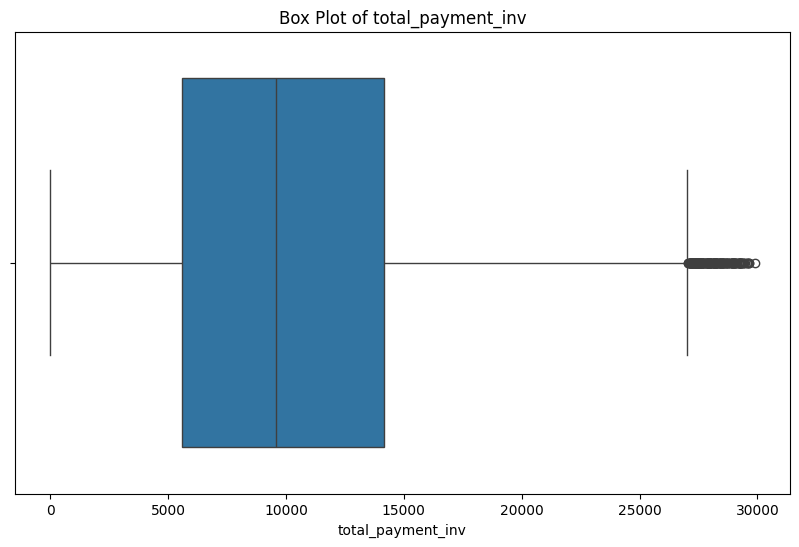

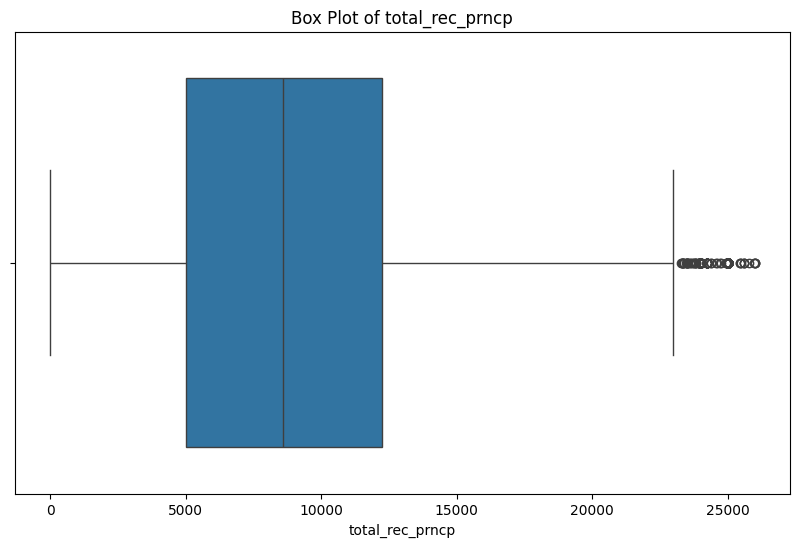

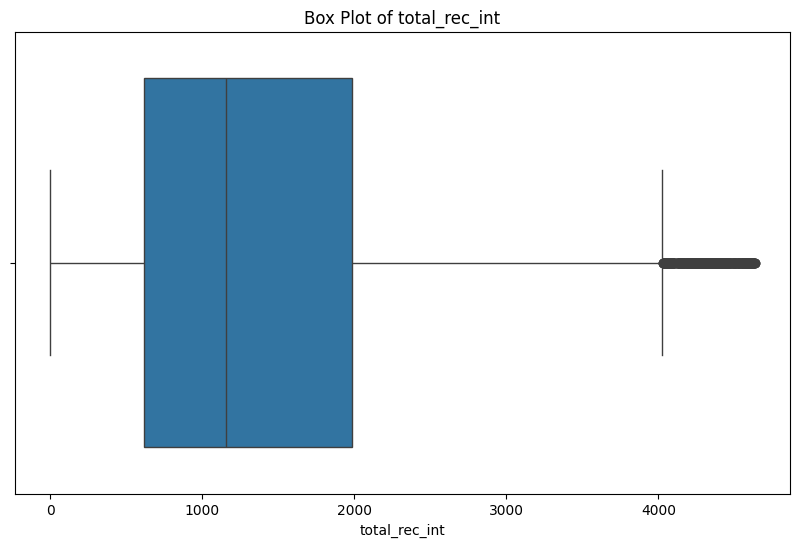

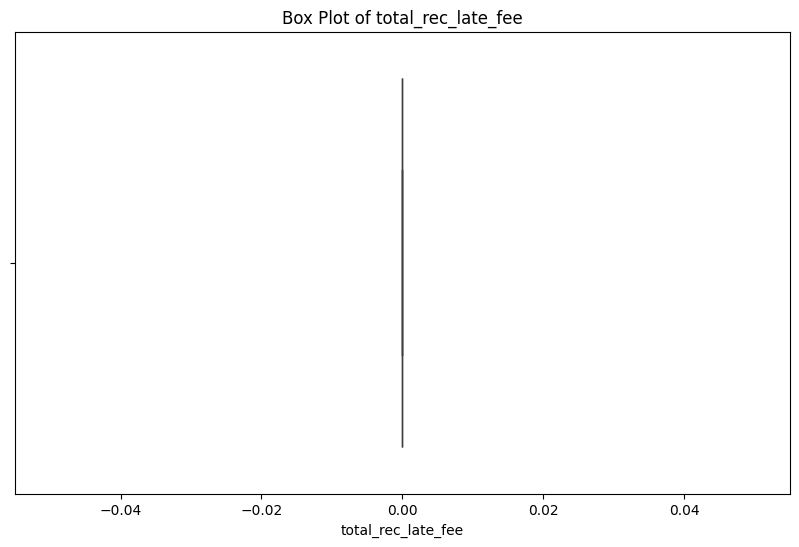

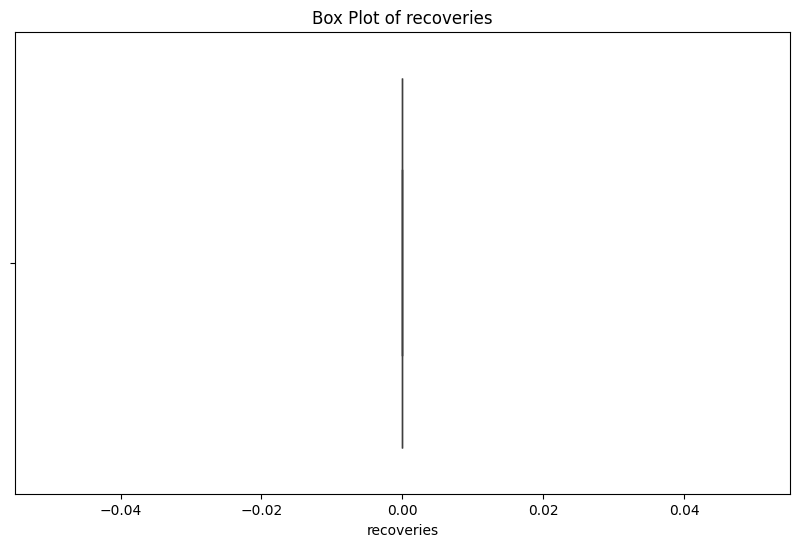

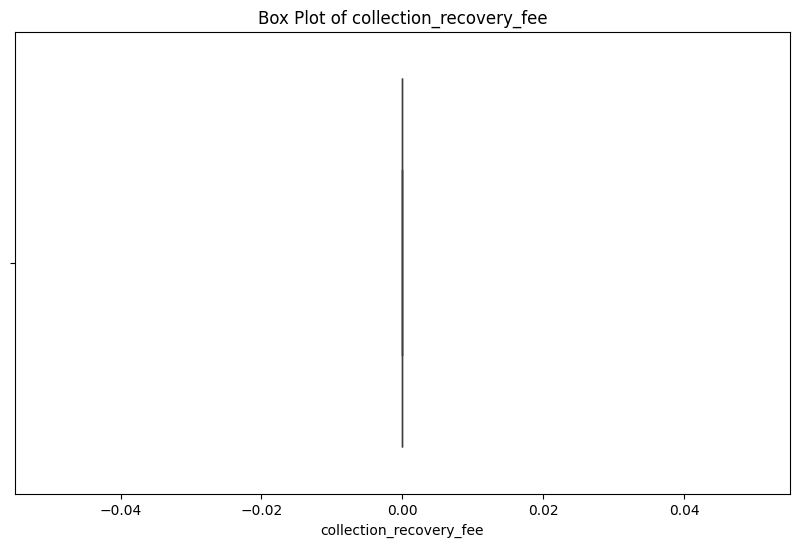

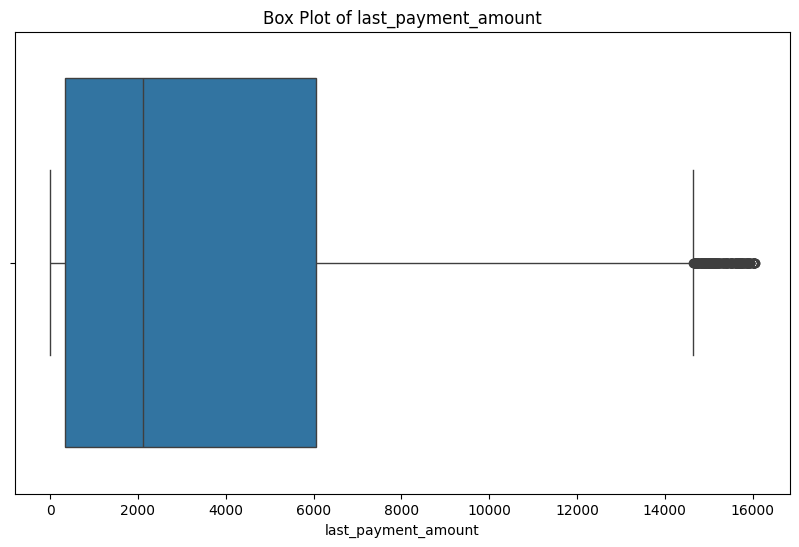

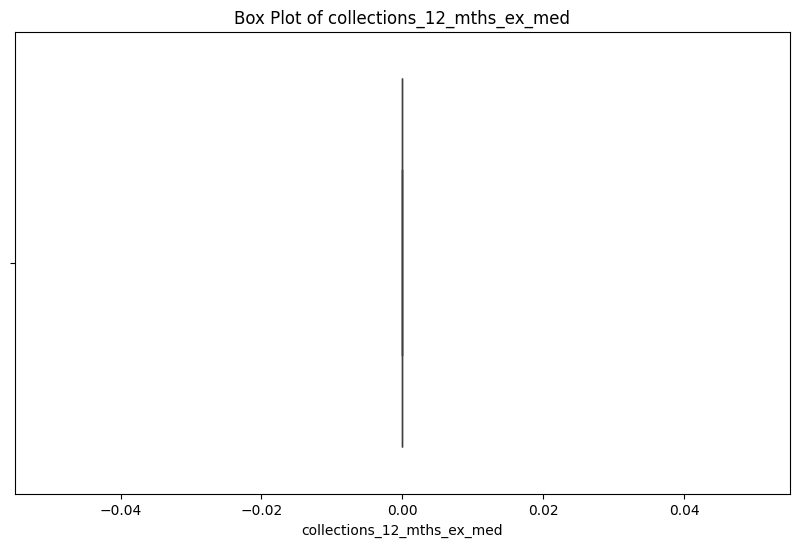

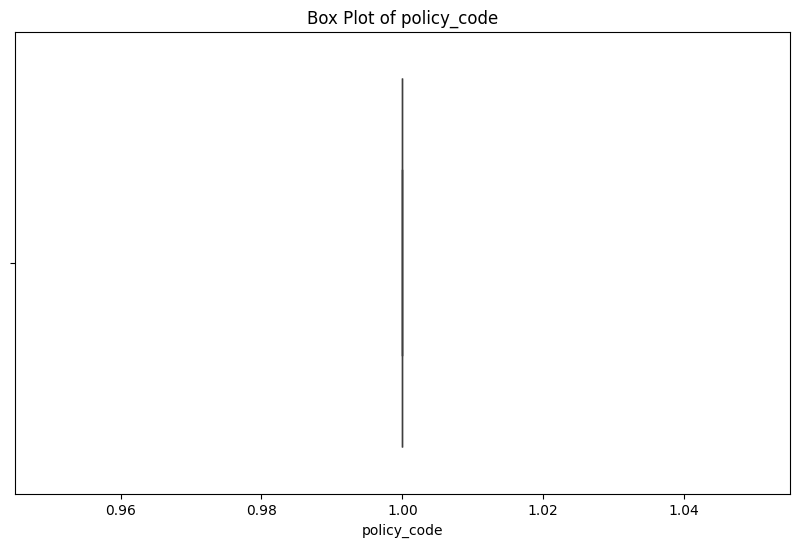

In [1]:
import pandas as pd
import numpy as np
from dataframe_transform import DataFrameTransform
from plotter import Plotter

# Load the cleaned data
df = pd.read_csv('loan_data_cleaned.csv')

# Instantiate the DataFrameTransform and Plotter classes
df_transformer = DataFrameTransform(df)
plotter = Plotter(df)

# Step 1: Visualize data to identify outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
plotter.plot_box(numeric_columns)

# Step 2: Identify and remove outliers
for column in numeric_columns:
    outliers = df_transformer.identify_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in {column}:")
        print(outliers)
        df_transformer.remove_outliers(column)

# Step 3: Re-visualize data to confirm outliers are removed
plotter.dataframe = df_transformer.dataframe  # Update Plotter's dataframe
plotter.plot_box(numeric_columns)

# Save the transformed data
df_transformer.dataframe.to_csv('loan_data_no_outliers.csv', index=False)


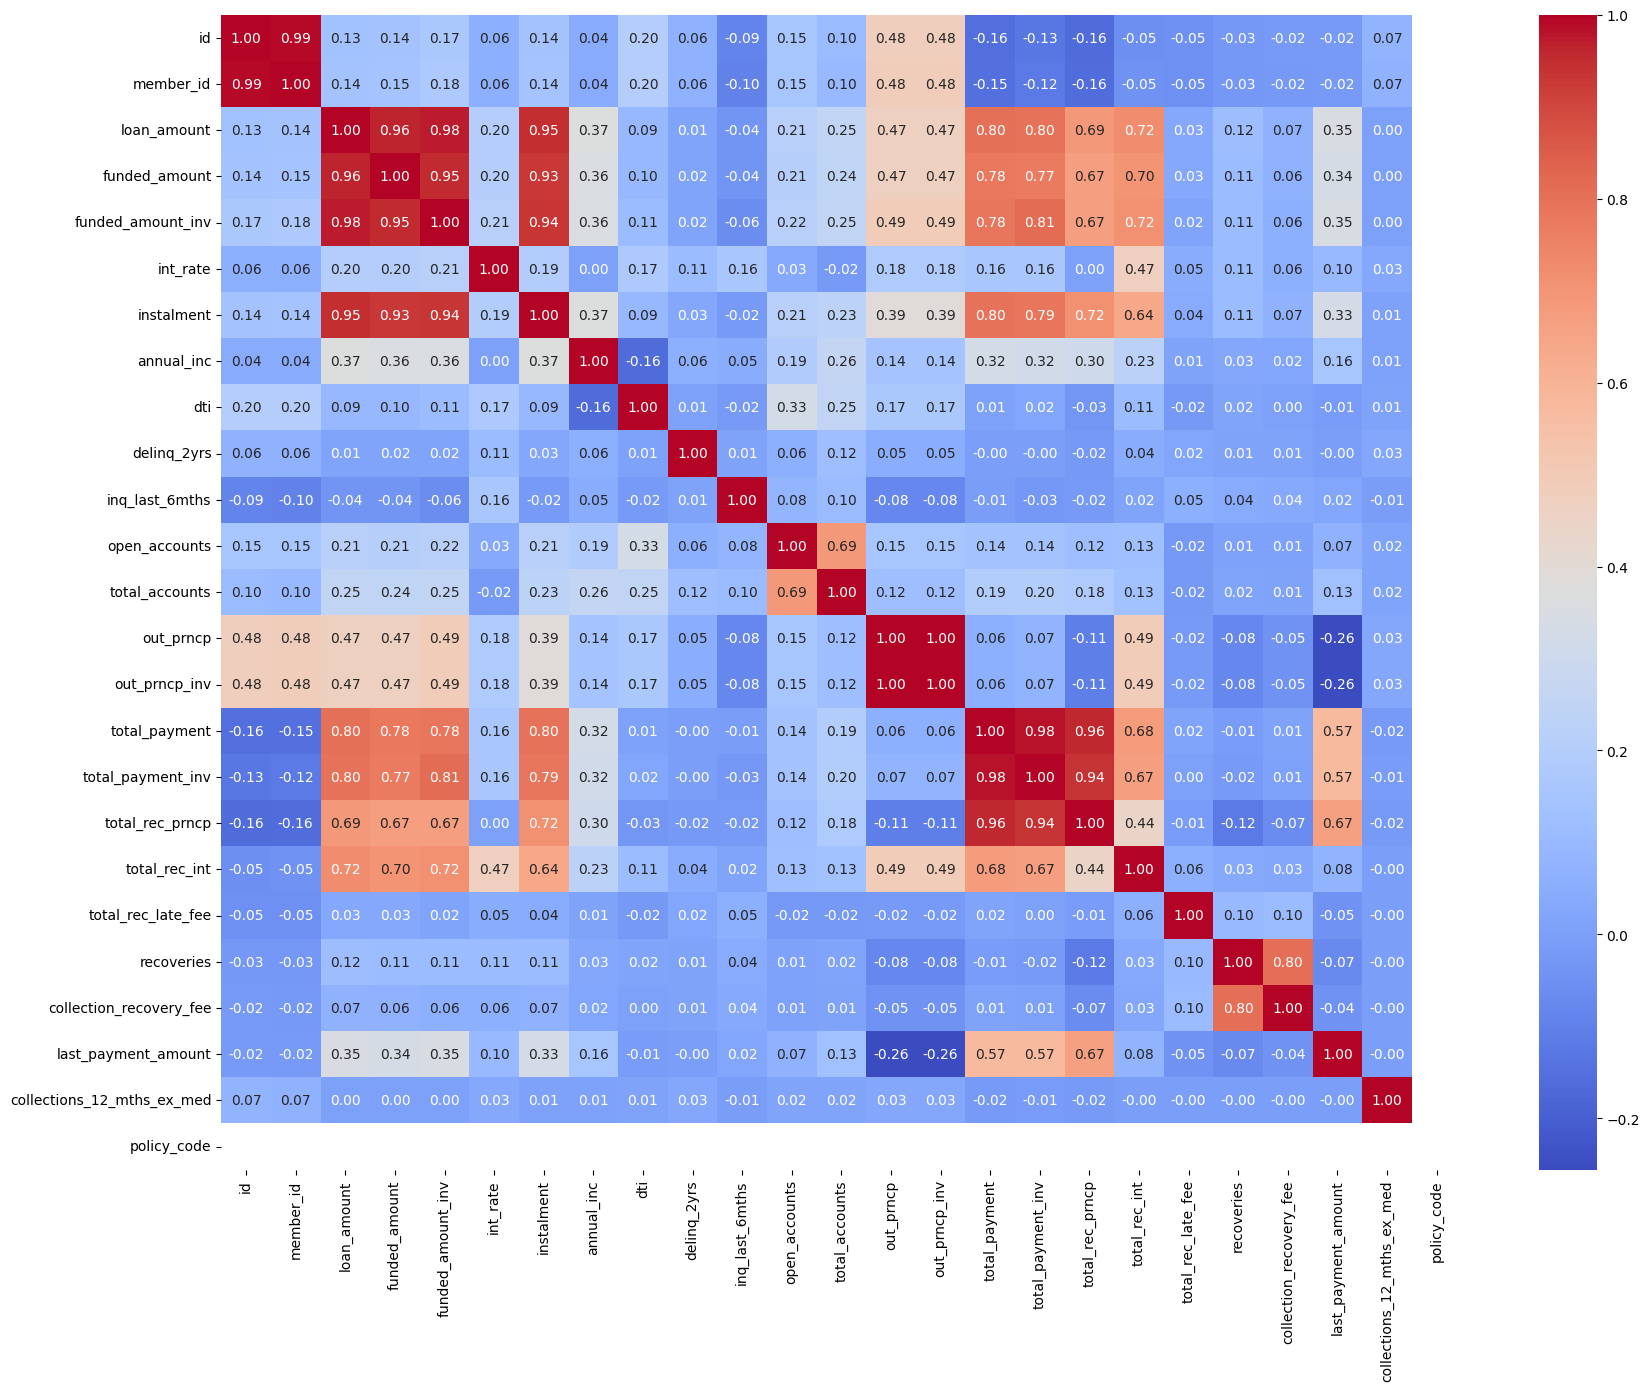

Highly Correlated Columns (threshold=0.85): ['member_id', 'funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp']


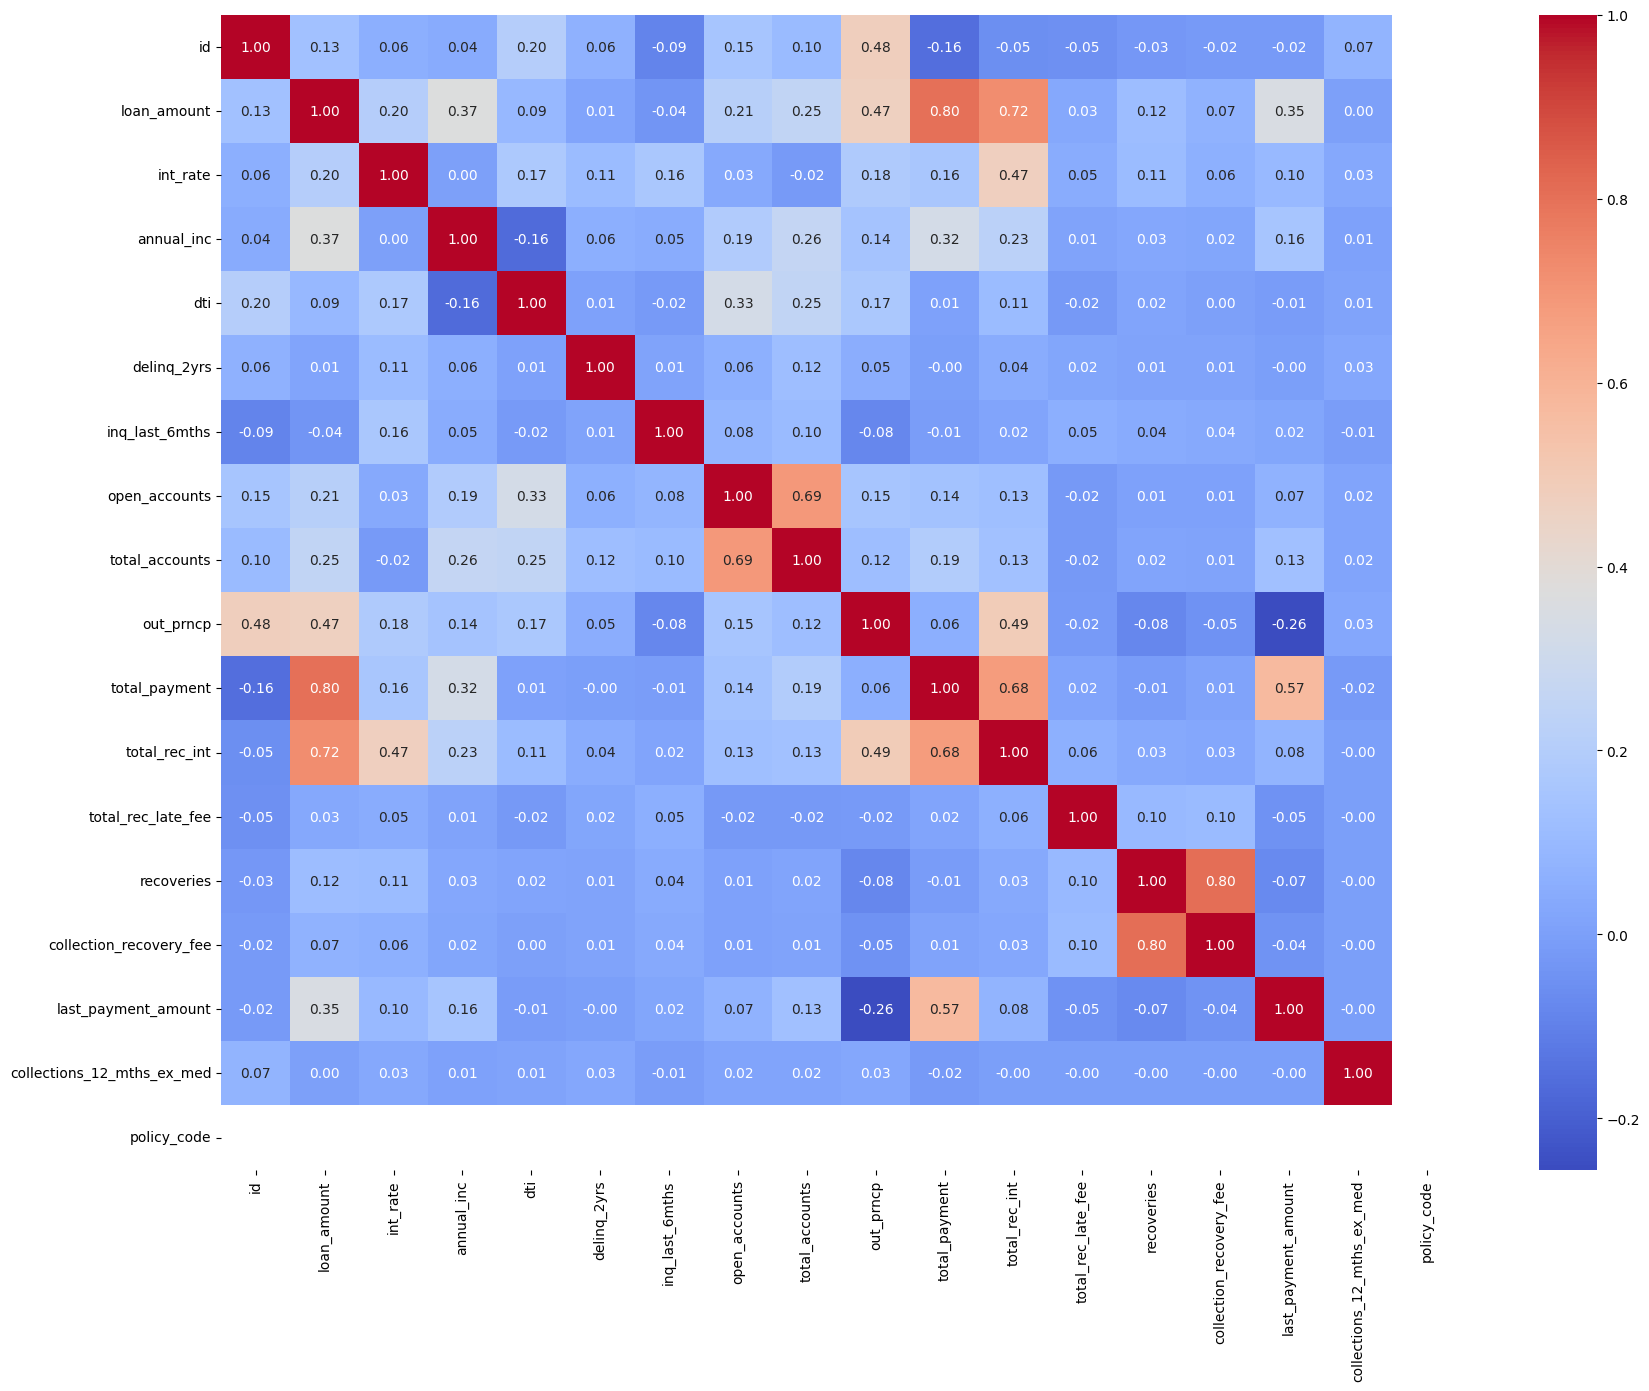

In [1]:
import pandas as pd
import numpy as np
from dataframe_transform import DataFrameTransform
from plotter import Plotter

# Load the cleaned dataset
df = pd.read_csv('loan_data_cleaned.csv')

# Instantiate the DataFrameTransform and Plotter classes
df_transformer = DataFrameTransform(df)
plotter = Plotter(df)

# Step 1: Compute and visualize the correlation matrix
plotter.plot_correlation_matrix()

# Step 2: Identify highly correlated columns
correlation_threshold = 0.85
highly_correlated_columns = df_transformer.drop_highly_correlated_columns(threshold=correlation_threshold)

# Step 3: Display the columns to be dropped
print(f"Highly Correlated Columns (threshold={correlation_threshold}): {highly_correlated_columns}")

# Step 4: Visualize the correlation matrix after dropping highly correlated columns
plotter.dataframe = df_transformer.dataframe  # Update plotter's dataframe
plotter.plot_correlation_matrix()

# Save the transformed dataset
df_transformer.dataframe.to_csv('loan_data_transformed.csv', index=False)
